# Паттерн Наблюдатель

Продолжая работу над игрой, вы добрались до системы достижений. Иногда игре нужно наградить игрока за то, что он достигает определенного результата в игре. Это может быть, например, прохождение всех заданий в игре, достижение определенного уровня, совершение какого-то сложного действия и т.д.

У каждой игры есть движок и интерфейс пользователя. Это два компонента, которые работают параллельно и взаимодействуют друг с другом. Достижения генерируются движком игры, а отображаются пользовательским интерфейсом. Кроме того, на современных игровых площадках, таких как Steam, Google Play, также отображаются достижения, полученные игроком. Для этого применяется как раз паттерн Наблюдатель.

У вас есть движок Engine, который может создавать уведомления о достижениях. Вам необходимо написать обертку над движком, которая будет иметь возможность подписывать наблюдателей и рассылать им уведомления, а также иерархию наблюдателей. В иерархию наблюдателей должны входить абстрактный наблюдатель, AbstractObserver, от которого унаследованы 2 наблюдателя ShortNotificationPrinter и FullNotificationPrinter. Первый из них составляет множество названий полученных достижений, второй составляет список достижений в том порядке, в котором они даны в системе. Имейте в виду, что каждое достижение должно быть учтено только один раз.

Иерархия классов приведена на следующей UML диаграмме:
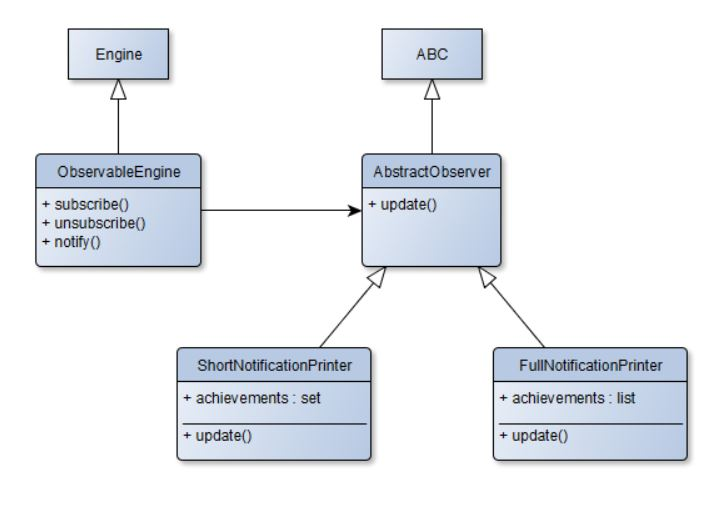

Пример достижения, которое генерирует движок:
{"title": "Покоритель", "text": "Дается при выполнении всех заданий в игре"}

Метод update не должен возвращать никаких значений, он должен только изменять переменную achievements.

Класс Engine реализовывать не нужно! 

In [1]:
from abc import ABC, abstractmethod

In [31]:
class Engine:
    pass


class ObservableEngine(Engine):
    def __init__(self): 
        self.__subscribers = set() # При инициализации множество подписчиков задается пустым
    
    def subscribe(self, subscriber):
        self.__subscribers.add(subscriber) # Для того чтобы подмисать пользователя, он добавляется во множество подписчиков
        
    def unsubscribe(self, subscriber):
        self.__subscribers.remove(subscriber) # Удаление подписчика из списка
        
    def notify(self, message):
        for subscriber in self.__subscribers:
            subscriber.update(message) # Отправка уведомления всем подписчикам
            
    def show(self):
        return self.__subscribers

In [32]:
class AbstractObserver(ABC):
    @abstractmethod
    def update(self, message): # Абстрактный наблюдатель задает метод update 
        pass

    
class ShortNotificationPrinter(AbstractObserver):
    def __init__(self):
        self.achievements = set()
    
    def update(self, message): # Конкретная реализация метода update
        self.achievements.add(message['title'])
        print(self.achievements)
        
        
class FullNotificationPrinter(AbstractObserver):
    def __init__(self):
        self.achievements = list()
        
    def update(self, message): # Конкретная реализация метода update
        if message not in self.achievements:
            self.achievements.append(message)
        print(self.achievements)

In [61]:
engine = ObservableEngine()
a = FullNotificationPrinter()
engine.subscribe(a)
engine.notify("")
